In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("training_data.csv")

In [4]:
X = df.iloc[:,0:51]
y = df.iloc[:,51]
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state= 11)


In [6]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy="median")
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_test[num_cols]  = num_imputer.transform(X_test[num_cols])

X_train = X_train.drop(columns=['id'])
X_test  = X_test.drop(columns=['id'])


In [19]:
# CatBoostClassifier(
#     iterations=1000,
#     depth=6,
#     learning_rate=0.01,
#     l2_leaf_reg=3,
#     loss_function="Logloss",
#     eval_metric="AUC",
#     random_seed=42,
#     verbose=False
# )


# model.fit(X_train, y_train)

In [20]:
# y_pred = model.predict(X_test)
# accuracy_score(y_test, y_pred)

0.9618938614360417

In [21]:
from sklearn.metrics import roc_auc_score
# y_pred_proba = model.predict_proba(X_test)[:, 1]
# print(y_pred_proba)

[0.0253903  0.02634231 0.02144824 ... 0.01695657 0.02366829 0.0220684 ]


In [22]:
# auc = roc_auc_score(y_test, y_pred_proba)
# print("AUC:", auc)


AUC: 0.638742429731543


In [25]:
from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)


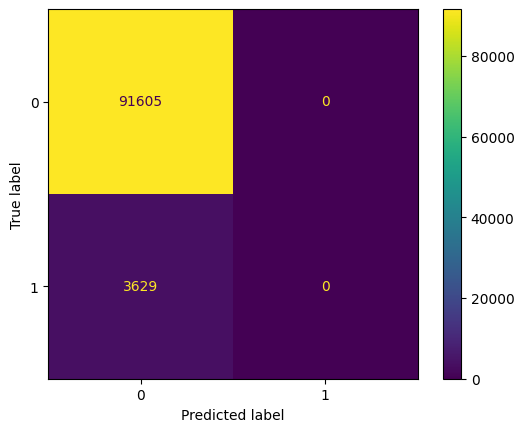

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
# plt.show()

In [29]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.0

In [55]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=2, shuffle = True, random_state=13)
skf.get_n_splits()
print(skf)
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_tr, X_va = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_va = y.iloc[train_index], y.iloc[test_index]
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

StratifiedKFold(n_splits=2, random_state=13, shuffle=True)
Fold 0:
  Train: index=[     0      4      9 ... 476165 476166 476167]
  Test:  index=[     1      2      3 ... 476163 476164 476168]
Fold 1:
  Train: index=[     1      2      3 ... 476163 476164 476168]
  Test:  index=[     0      4      9 ... 476165 476166 476167]


In [59]:
neg = (y_tr == 0).sum()
pos = (y_tr == 1).sum()

CatBoostClassifier(
    iterations=1000,
    depth=6,
    learning_rate=0.01,
    l2_leaf_reg=3,
    loss_function="Logloss",
    scale_pos_weight = neg/pos,
    eval_metric="AUC",
    random_seed=42,
    verbose=False
)


model.fit(X_tr, y_tr)

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=0]="Cust_548535": Cannot convert 'Cust_548535' to float

In [50]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC:", auc)

AUC: 0.638742429731543


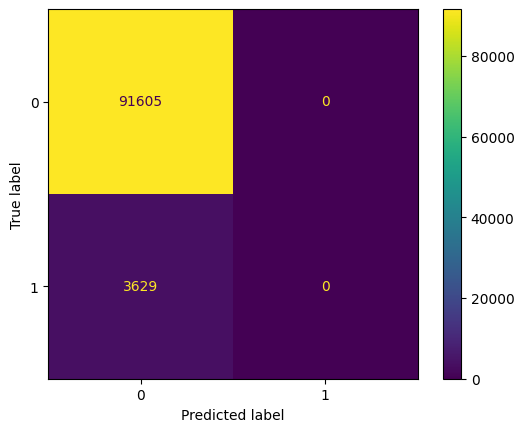

In [57]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()